In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imsave
from skimage.transform import rescale
from skimage import img_as_ubyte
import pickle

In [2]:
# Frame loaded image within a square generic image
def margin_img(I):
    H, W = I.shape[0], I.shape[1]
    r = 256 / np.max([H, W])
    I = rescale(I, (r, r, 1))
    O = np.zeros((256, 256, 3))

    H, W = I.shape[0], I.shape[1]
    margin = np.round(np.abs(H-W) / 2).astype('int')
    if H > W:
        O[:, margin:margin+W, :] = I
    else:
        O[margin:margin+H, :, :] = I
        
    return img_as_ubyte(O)

In [3]:
# Load image
def load_image(img_id):
    I = imread('Flickr8k_Dataset/' + img_id)
    I = margin_img(I)
    return I

In [4]:
# Load data
df = pd.read_csv("Flickr8k.token.txt", sep='\t', names=['ID', 'Text'], index_col=False)
print(df.shape)

# Remueve entries with nan values
df.dropna(inplace=True)
df.isnull().values.any()
df

(40460, 2)


,ID,Text
0,1000268201_693b08cb0e.jpg#0,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg#1,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg#2,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg#3,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg#4,A little girl in a pink dress going into a woo...
...,...,...
40455,997722733_0cb5439472.jpg#0,A man in a pink shirt climbs a rock face
40456,997722733_0cb5439472.jpg#1,A man is rock climbing high in the air .
40457,997722733_0cb5439472.jpg#2,A person in a red shirt climbing up a rock fac...
40458,997722733_0cb5439472.jpg#3,A rock climber in a red shirt .


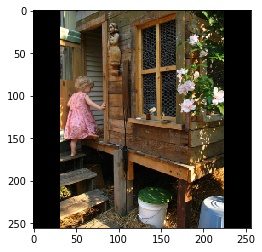

In [6]:
# See for one example
I = load_image(df['ID'][0][:-2])
plt.imshow(I)
imsave('Normalized_images/' + df['ID'][0][:-6] + '_' + df['ID'][0][-1] + '.jpg', I)

In [5]:
# Load images, rescale and save them, and keep track of found and not found
found_y = []
found_n = []

for index, row in df.iterrows():
    try:
        img = load_image(row['ID'][:-2])
        new_name = row['ID'][:-6] + '_' + row['ID'][-1] + '.jpg'
        imsave('Normalized_images/' + new_name, img)
        found_y.append(row['ID'])
    except:
        found_n.append(row['ID'])